In [12]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

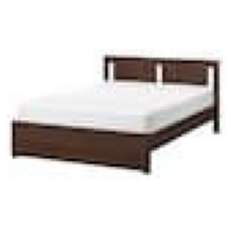

In [13]:
image = cv2.imread('my_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.axis('off');

In [14]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        hex_color += ("{:02x}".format(int(i)))
    return hex_color

In [15]:
def preprocess(raw):
    image = cv2.resize(raw, (299, 299), interpolation = cv2.INTER_AREA)
    image = image.reshape(image.shape[0]*image.shape[1], 3)
    return image

In [32]:
def analyze(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]

    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    plt.savefig("my_pie.png")
    #print("Found the following colors:\n")
    lis={}
    for color,y in zip(hex_colors,counts.values()):
     # print(color,"  ",y)
      lis[y]=color
    
    return lis

Found the following colors:

#fcfcfc    66401
#8f8581    5534
#241613    2242
#d1cdcb    11802
#4d3830    3422
#d1cdcb   11802
#8f8581   5534


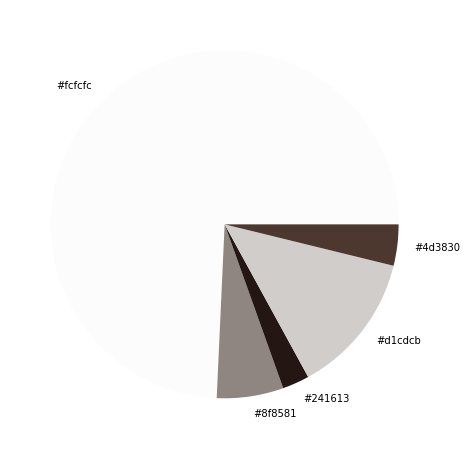

In [43]:
modified_image = preprocess(image)
lis = analyze(modified_image)
top2=sorted(lis.keys(),reverse=True)
for i in range(2):
  print(lis[top2[i+1]]," ",top2[i+1])